Inportamos las librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from pandas import DataFrame


Procedemos a cargar el archivo 'games.parquet'

In [2]:
df = pd.read_parquet('games.parquet')

El siguiente comando me permite configurar a pandas para que muestre todas las columnas de Dataframe

In [3]:
pd.set_option('display.max_columns', None)

Ya con el archivo cargado en la variable df, mostraremos parte del Dataframe

In [4]:
df.tail(15)

,user_id,item_id,item_name,playtime_forever,recommend,sentiment_analysis,year,publisher,release_date,price,developer,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
1380470,76561198083674299,345290,The Quivering,0.0,True,1,2013,Alternative Software Ltd,2015-01-28,3.99,Charybdis Ltd,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1380471,76561198084771161,448020,Share,0.0,True,2,0,HFM Games,2016-05-03,4.99,HFM Games,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1380472,Shadowbolt4231,463320,The Sea Eternal,0.1,True,2,2014,Choice of Games,2016-04-22,6.99,Choice of Games,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1380473,BNCFan,389970,Blues and Bullets - Digital Comic,0.1,True,1,2014,A Crowd of Monsters,2015-07-23,2.99,A Crowd of Monsters,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1380474,PulpCraft,389970,Blues and Bullets - Digital Comic,0.2,True,1,2015,A Crowd of Monsters,2015-07-23,2.99,A Crowd of Monsters,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1380475,moruera,389970,Blues and Bullets - Digital Comic,0.6,True,2,0,A Crowd of Monsters,2015-07-23,2.99,A Crowd of Monsters,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1380476,BNCFan,399600,I and Me,0.2,True,1,2014,Wish Fang,2016-05-05,9.99,Wish Fang,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1380477,NotForPikachu,366350,ROGUS - Kingdom of The Lost Souls,0.3,True,2,2013,IronDrop Studios,2015-06-30,4.99,IronDrop Studios,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1380478,NotForPikachu,386710,StoryMode - A Game About Crafting,0.2,True,2,2013,Luna.red,2017-10-02,9.99,Nicholas Hydock,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1380479,gamingninjer,329890,MyRPG Master,3.5,False,1,2015,Plug In Digital,2015-02-09,39.99,DragonHead Studio,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0


Mostramos información sobre el dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380485 entries, 0 to 1380484
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   user_id                    1380485 non-null  object 
 1   item_id                    1380485 non-null  int32  
 2   item_name                  1380485 non-null  object 
 3   playtime_forever           1380485 non-null  float64
 4   recommend                  1380485 non-null  bool   
 5   sentiment_analysis         1380485 non-null  int64  
 6   year                       1380485 non-null  int64  
 7   publisher                  1380485 non-null  object 
 8   release_date               1380485 non-null  object 
 9   price                      1380485 non-null  float64
 10  developer                  1380485 non-null  object 
 11  Action                     1380485 non-null  int64  
 12  Adventure                  1380485 non-null  int64  
 13  Animation &a

En nuestro proceso de ETL nos percatamos de que la antigua columna 'posted' no tenia todos los años, gran parte eran fechas incompletas, por eso cuando generamos la columna 'year' hay años que estan en 0, nos disponemos a visualizar la distribución de esta variable en un histograma.

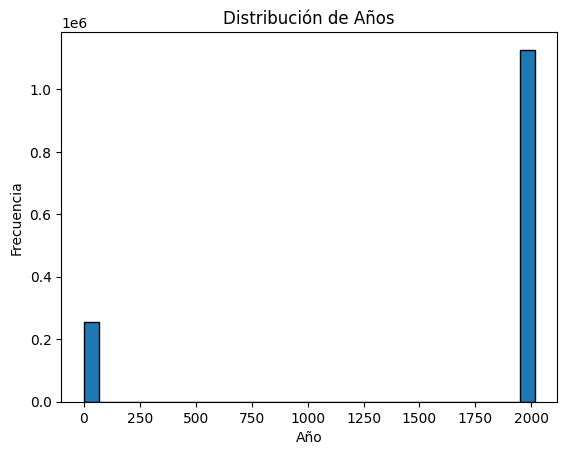

In [6]:
# Crea el histograma
plt.hist(df['year'], bins=30, edgecolor='black')  # Puedes ajustar el número de bins según tu preferencia

# Añade etiquetas y título
plt.title('Distribución de Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Los años que estan en 0 distorsionan la gráfica, por eso en el siguiente gráfico utilizaremos un gráfico de barras donde excluiremos los años iguales a 0

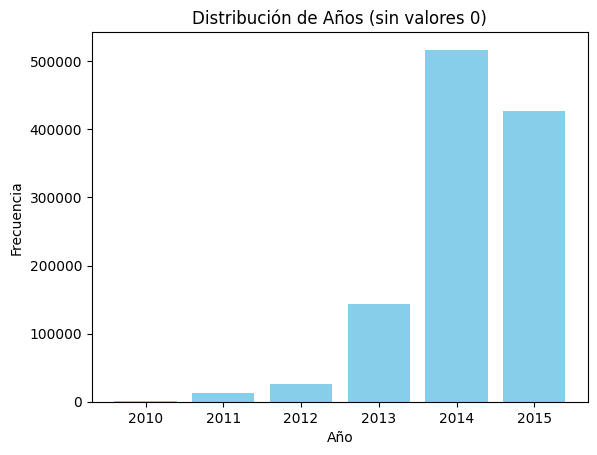

In [7]:
# Filtrar los años mayores que 0
df_filtered = df[df['year'] > 0]

# Contar la frecuencia de cada año
year_counts = df_filtered['year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(year_counts.index, year_counts.values, color='skyblue')

# Añadir etiquetas y título
plt.title('Distribución de Años (sin valores 0)')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


A los años iguales a 0 les asignaremos de manera aquitativa los valores 2010,2011,2012,2013,2014,2015, si le asignamos todo el valor a un solo año seguramente vamos a sesgar la información.

In [8]:
# creamos máscara para seleccionar las filas con 'year' igual a cero
mask = df['year'] == 0

# Identifiacmos los años distintos de cero
non_zero_years = df[df['year'] != 0]['year'].unique()

# esta línea busca redistribuir equitativamente valores no nulos a las filas donde 'year' es igual a 0, 
# proporcionando una distribución más equilibrada de años en el conjunto de datos.
df.loc[mask, 'year'] = np.tile(non_zero_years, len(mask) // len(non_zero_years) + 1)[:sum(mask)]

# Verificamos la distribución después del ajuste
distribution_after_adjustment = df['year'].value_counts()
print(distribution_after_adjustment)



year
2014    559339
2015    469159
2013    185900
2012     67987
2011     54880
2010     43220
Name: count, dtype: int64


Mostraremos la distribución despues del ajuste

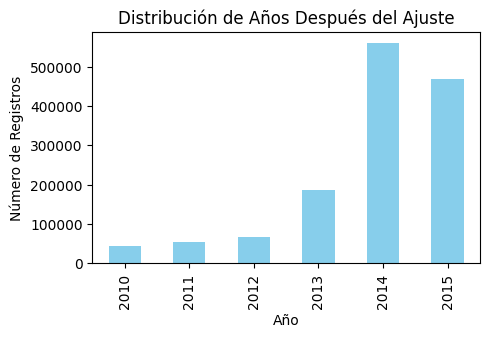

In [9]:
# Grafica un histograma de la columna 'year' después del ajuste
plt.figure(figsize=(5, 3))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Años Después del Ajuste')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.show()

En el sguiente gráfico mostraremos las categorías con mas calificaciones positivas, tomando el valor 2 de la columna 'sentiment_analysis'.

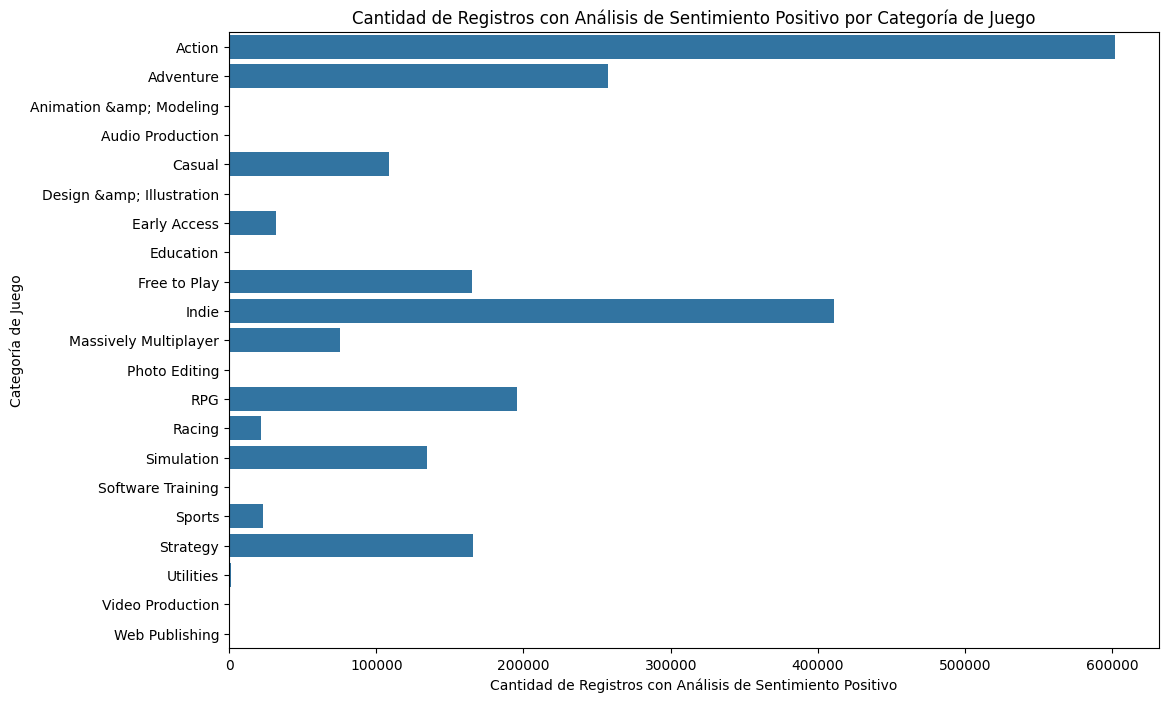

In [10]:
# Seleccionar las columnas de categorías de juego
categories = ['Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production', 'Casual',
              'Design &amp; Illustration', 'Early Access', 'Education', 'Free to Play', 'Indie',
              'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
              'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production',
              'Web Publishing']

# Crear un DataFrame auxiliar para el análisis
category_df = df[['sentiment_analysis'] + categories]

# Filtrar solo los registros con 'sentiment_analysis' igual a 2
positive_sentiment_df = category_df[category_df['sentiment_analysis'] == 2]

# Contar la cantidad de registros con 'sentiment_analysis' igual a 2 para cada categoría
positive_sentiment_counts = positive_sentiment_df[categories].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=positive_sentiment_counts.values, y=positive_sentiment_counts.index, orient='h')
plt.title('Cantidad de Registros con Análisis de Sentimiento Positivo por Categoría de Juego')
plt.xlabel('Cantidad de Registros con Análisis de Sentimiento Positivo')
plt.ylabel('Categoría de Juego')
plt.show()



las categorías 'Action', 'Indie' y 'Adventure' con las cateorías con mas aceptación

En el siguiente código gereraremos un wordcloud para tener una idea de los juegos mas jugados con respecto al tiempo reflejado en la columna 'playtime_forever'

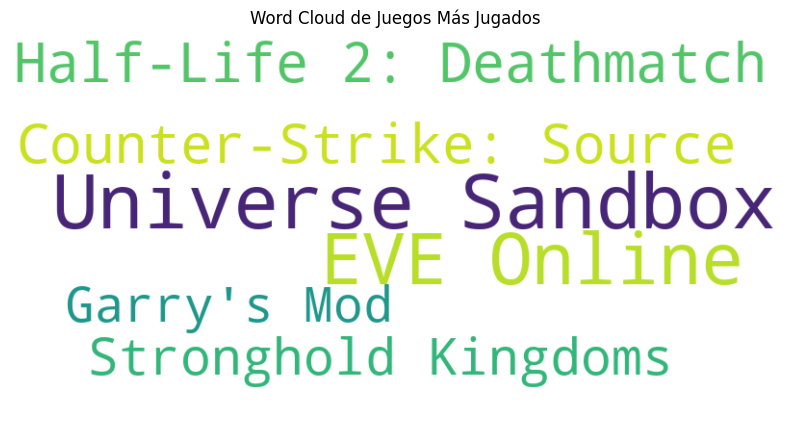

In [11]:
# Obtiene los datos necesarios (item_id y playtime_forever) para los juegos más jugados
most_played_games = df[['item_name', 'playtime_forever']].nlargest(10, 'playtime_forever')

# Crea un diccionario con item_name como clave y playtime_forever como valor
game_playtime_dict = dict(zip(most_played_games['item_name'], most_played_games['playtime_forever']))

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(game_playtime_dict)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Juegos Más Jugados')
plt.show()

Haremos lo mismo con la columna 'developer', la idea del siguiente codigo en mostrar un wordcloud con las desarrolladoras con más horas de juego

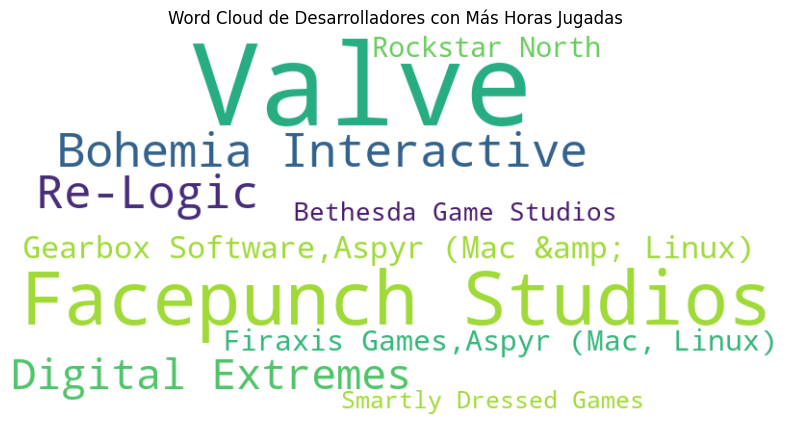

In [12]:
# Obtener los datos necesarios (developer y playtime_forever) para los desarrolladores con más horas jugadas
top_developers = df.groupby('developer')['playtime_forever'].sum().nlargest(10).reset_index()

# Crear un diccionario con developer como clave y playtime_forever como valor
developer_playtime_dict = dict(zip(top_developers['developer'], top_developers['playtime_forever']))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(developer_playtime_dict)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Desarrolladores con Más Horas Jugadas')
plt.show()

Ahora mostraremos los 10 jugadores con mas dinero gastado

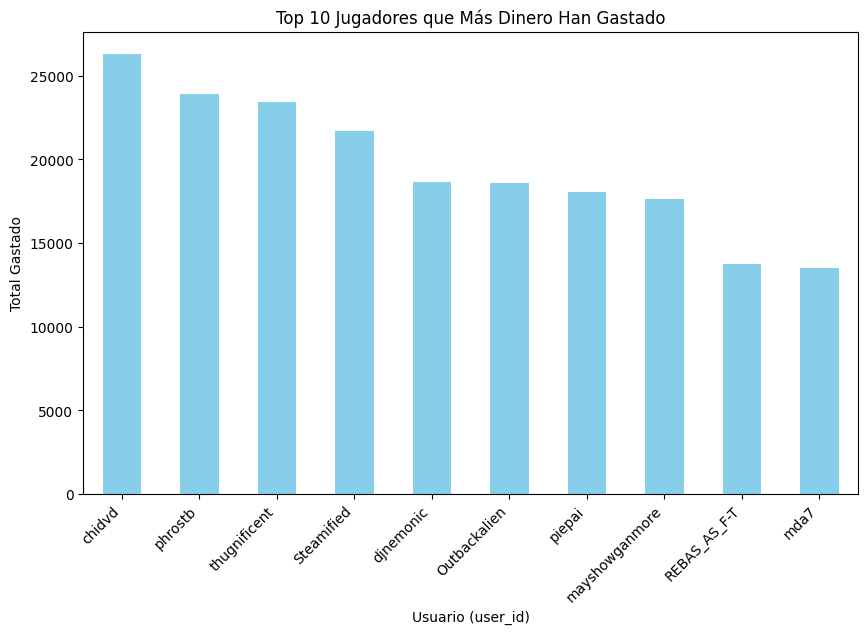

In [13]:
# Obtiene los 10 jugadores que más dinero han gastado
top_spenders = df.groupby('user_id')['price'].sum().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_spenders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Jugadores que Más Dinero Han Gastado')
plt.xlabel('Usuario (user_id)')
plt.ylabel('Total Gastado')
plt.xticks(rotation=45, ha='right')
plt.show()

El siguiente gráfico muestra los juegos que más dinero recaudaron

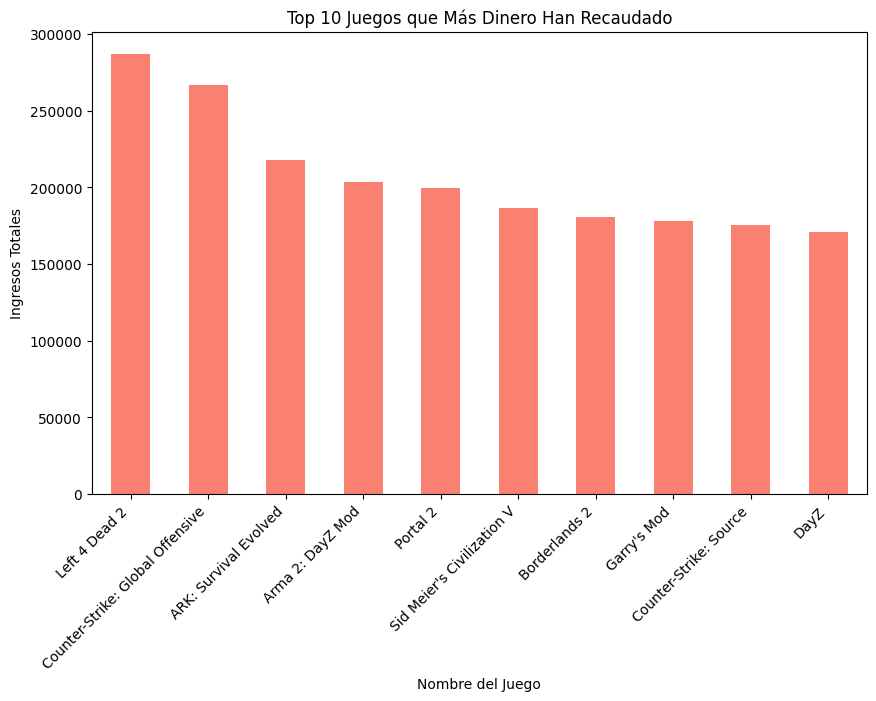

In [14]:
# Obtiene los juegos que más dinero han recaudado
top_games_revenue = df.groupby('item_name')['price'].sum().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_games_revenue.plot(kind='bar', color='salmon')
plt.title('Top 10 Juegos que Más Dinero Han Recaudado')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45, ha='right')
plt.show()

Vamos a revisar si el campo precio contiene ouliers

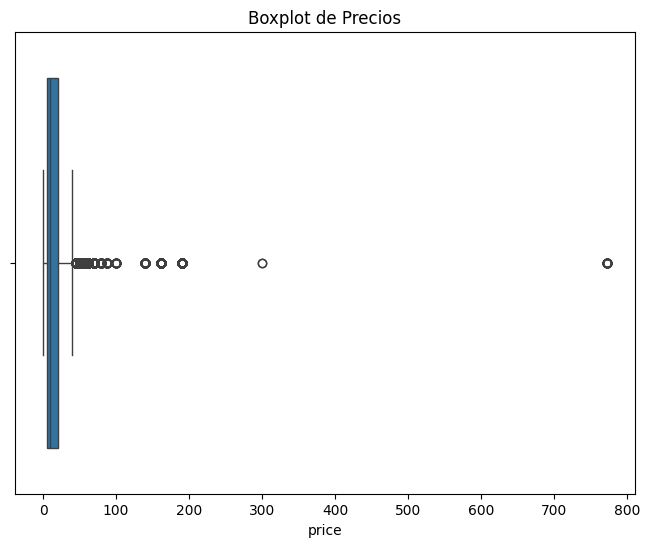

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot de Precios')
plt.show()

Podemos ver que si hay valores atípicos, entonces procederemos a ver la cantidad de items con un precio mayor a 100

In [16]:
high_price_records = df[df['price'] > 100]
total_high_price_records = high_price_records.shape[0]
print(f'Total de registros con precio mayor a 100: {total_high_price_records}')

Total de registros con precio mayor a 100: 1439


Existen 1439 registros con un price > 100, para evitar sesgo, vamos a cambiar esos valores por la media aritmética.

In [17]:
# Calcular la media aritmética de la columna 'price'
mean_price = df['price'].mean()

# Reemplazar los valores mayores a 100 por la media aritmética
df.loc[df['price'] > 100, 'price'] = mean_price


la distribución de precios despues de aplicar el valor de la media quedo de la siguiente manera

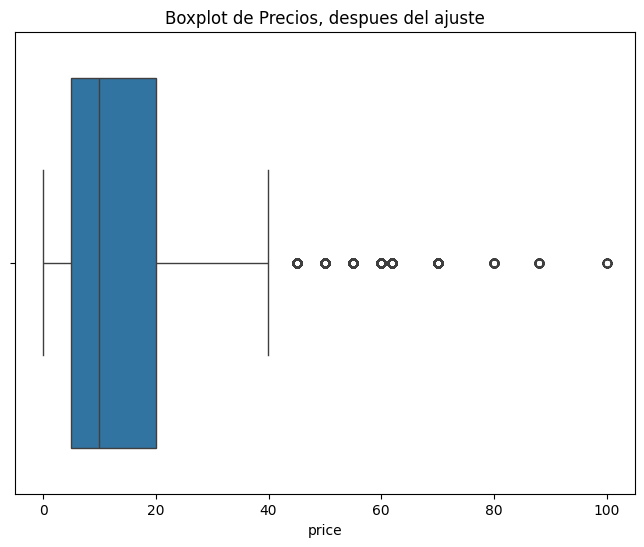

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot de Precios, despues del ajuste')
plt.show()

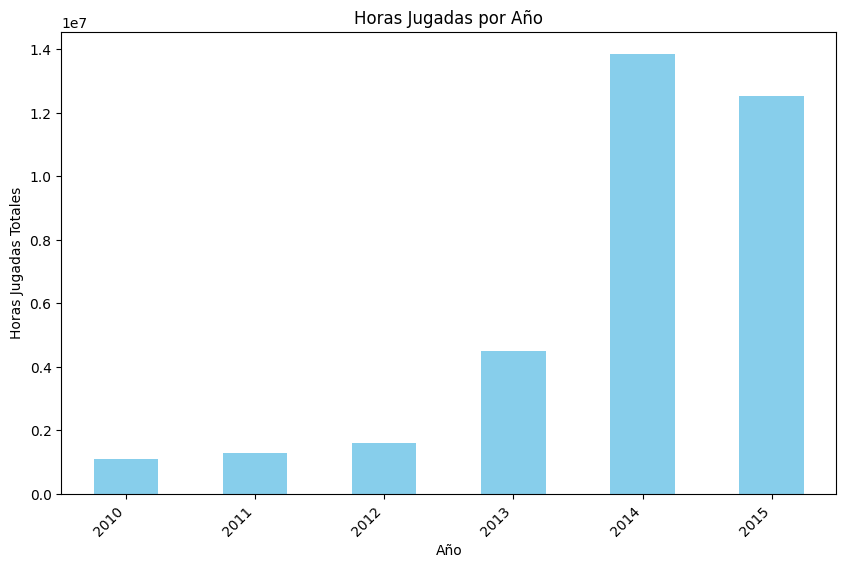

In [19]:
# Obtener los años con más horas jugadas
years_playtime = df.groupby('year')['playtime_forever'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
years_playtime.plot(kind='bar', color='skyblue')
plt.title('Horas Jugadas por Año')
plt.xlabel('Año')
plt.ylabel('Horas Jugadas Totales')
plt.xticks(rotation=45, ha='right')
plt.show()

Vamos a realizar un analisis de correlación de variables con: 'playtime_forever', 'recommend', 'sentiment_analysis', 'year', 'price'

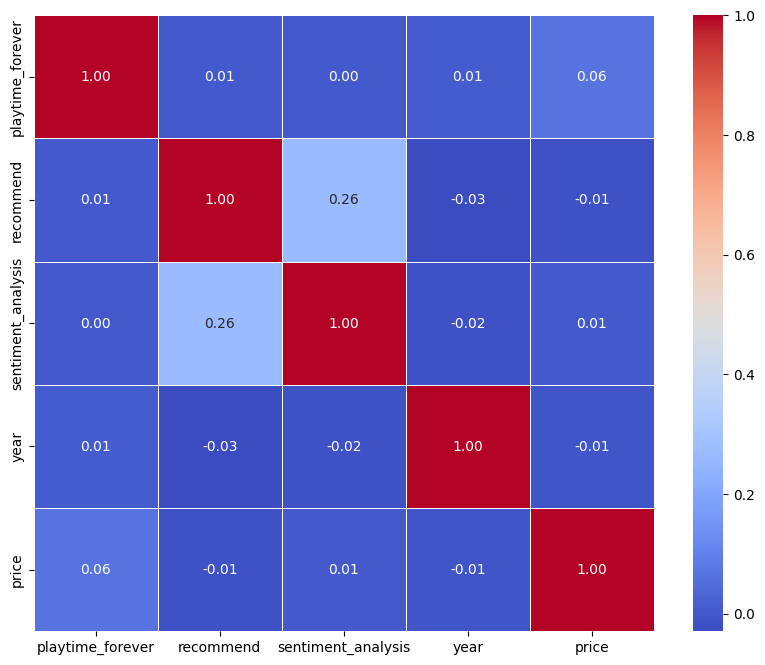

In [20]:
# Estoy utilizando algunas columnas de tu DataFrame original
data = df[['playtime_forever', 'recommend', 'sentiment_analysis', 'year', 'price']]

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el mapa de calor
plt.show()

La correlación mas alta la encontramos en recomend y sentimen_analysis lo que se puede considerar como una correlación positiva moderada.  Esto significa que a medida que una variable aumenta, la otra tiende a aumentar también, y viceversa.

En el siguiente bloxplot veremos la distribución de las horas jugadas con respecto a los usuarios y un analisis estadistico de la variable playtime_forever

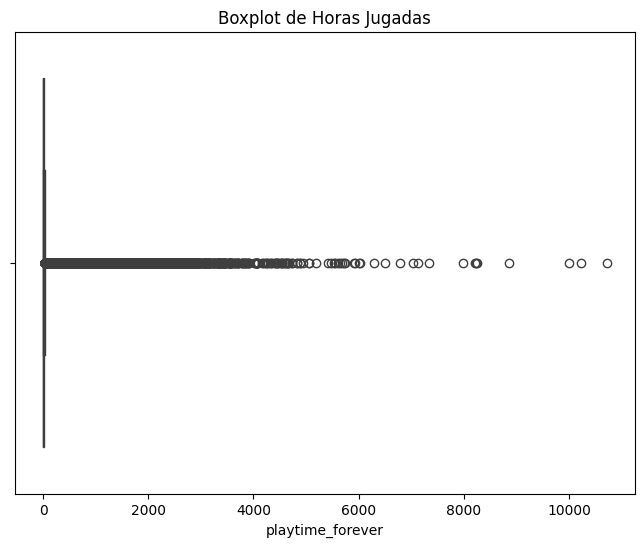

count    1.380485e+06
mean     2.527260e+01
std      1.159466e+02
min      0.000000e+00
25%      8.000000e-01
50%      3.300000e+00
75%      1.230000e+01
max      1.071290e+04
Name: playtime_forever, dtype: float64


In [21]:
# Boxplot para una variable numérica
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['playtime_forever'])
plt.title('Boxplot de Horas Jugadas')
plt.show()

# Resumen estadístico descriptivo
print(df['playtime_forever'].describe())


No consideraremos outliers estos valores, ya que es posible que un jugador en varios años juege esa cantidad de tiempo

---------------------------------------------------------------------------------------------

Sistema de Recomendación

Crearemos una nueva DataFrame que contenga solo las columnas relevantes para el cálculo de similitud del coseno. Luego, calcularemos la matriz de similitud del coseno entre los juegos basándonos en estas columnas. Cabe destacar, que este sera el modelo a desplegar en nuestra api.

prueba

In [22]:
# seleccionaremos las siguientes columnas:
df_items_unicos = df[['item_id', 'item_name', 'Action', 'Adventure', 'Casual', 'Indie', 'RPG', 'Simulation', 'Strategy']]

# Eliminar duplicados en 'item_id', para poder desplegar el sistema debemos usar un dataset lo mas compacto posible.
df_items_unicos = df_items_unicos.drop_duplicates(subset='item_id')

# Establecer 'item_id' como índice
df_items_unicos.set_index('item_id', inplace=True)

# Excluir la columna 'item_name' antes de calcular la similitud del coseno
df_similitud = cosine_similarity(df_items_unicos.drop('item_name', axis=1))

def recomendacion_juego(item_id, n=5):
    # Verificar si el 'item_id' existe
    if item_id not in df_items_unicos.index:
        return f"No se encontró información para el juego con item_id '{item_id}'"
    
    # Obtener la fila de similitud correspondiente
    fila_similitud = df_similitud[df_items_unicos.index.get_loc(item_id)]
    
    # Obtener los 'item_id' recomendados ordenados por similitud en orden descendente y seleccionar los primeros n
    juegos_recomendados = df_items_unicos.index[fila_similitud.argsort()[::-1][:n]]
    
    # Obtener los 'item_name' correspondientes a los 'item_id' recomendados
    juegos_recomendados_nombres = df_items_unicos.loc[juegos_recomendados, 'item_name'].tolist()
    
    return juegos_recomendados_nombres

In [23]:
# Ejemplo de uso
item_id_ejemplo = 80 # Reemplaza con el item_id real del juego
recomendaciones = recomendacion_juego(item_id_ejemplo)
print(f"Juegos recomendados para '{item_id_ejemplo}': {recomendaciones}")

Juegos recomendados para '80': ['Counter-Strike', 'Call of Duty', 'The Lost Mythologies', 'Bloodline Champions', 'Renegade Ops']


despues de analizar los endspoint solicitados para nuestra API vamos a proceder con eliminar todas las columnas innecesarias para nuestro trabajo, publisher y developers tiene casi la misma información, para nuestros endpoins developers contiene la información que necesitamos, release_date no es requerida, para los efectos de fecha usaremos la columna year, con respecto a las columnas de las caterogías de juego vamos a eliminar: Animation &amp; Modeling, Modeling - Audio Production - Desing &amp; Illustration - Education - Photo Editing - Software Trainig - Utilities - Video Production - Web Publishing, estas columnas tienen muy pocos juegos con estas categorías.

In [24]:
# Lista de columnas para contar el número de 1
columns_to_count_ones = [
    'Action',
    'Adventure',
    'Animation &amp; Modeling',
    'Audio Production',
    'Casual',
    'Design &amp; Illustration',
    'Early Access',
    'Education',
    'Free to Play',
    'Indie',
    'Massively Multiplayer',
    'Photo Editing',
    'RPG',
    'Racing',
    'Simulation',
    'Software Training',
    'Sports',
    'Strategy',
    'Utilities',
    'Video Production',
    'Web Publishing'
]

# Contar el número de 1 en cada columna y almacenar los resultados en un diccionario
ones_count = {column: df[column].sum() for column in columns_to_count_ones}

# Mostrar los resultados
for column, count in ones_count.items():
    print(f"Número de 1 en la columna '{column}': {count}")

# Ahora, puedes decidir si deseas eliminar las columnas


Número de 1 en la columna 'Action': 949627
Número de 1 en la columna 'Adventure': 405885
Número de 1 en la columna 'Animation &amp; Modeling': 968
Número de 1 en la columna 'Audio Production': 33
Número de 1 en la columna 'Casual': 173096
Número de 1 en la columna 'Design &amp; Illustration': 1372
Número de 1 en la columna 'Early Access': 50278
Número de 1 en la columna 'Education': 342
Número de 1 en la columna 'Free to Play': 263239
Número de 1 en la columna 'Indie': 646192
Número de 1 en la columna 'Massively Multiplayer': 118905
Número de 1 en la columna 'Photo Editing': 26
Número de 1 en la columna 'RPG': 304050
Número de 1 en la columna 'Racing': 34145
Número de 1 en la columna 'Simulation': 207201
Número de 1 en la columna 'Software Training': 316
Número de 1 en la columna 'Sports': 36501
Número de 1 en la columna 'Strategy': 254951
Número de 1 en la columna 'Utilities': 1663
Número de 1 en la columna 'Video Production': 603
Número de 1 en la columna 'Web Publishing': 930


El codigo anterior confirma la poca concurrencia de las columnas mencionadas, en el siguiente codigo procederemos a eliminarlas

In [25]:
# Lista de columnas a eliminar
columns_to_remove = [
    'publisher',
    'release_date',
    'Animation &amp; Modeling',
    'Audio Production',
    'Design &amp; Illustration',
    'Education',
    'Photo Editing',
    'Software Training',
    'Utilities',
    'Video Production',
    'Web Publishing',
    'Sports',
    'Racing',
    'Early Access',
    'Casual',
    'Simulation'
]

# Eliminar las columnas del DataFrame
df.drop(columns=columns_to_remove, inplace=True)

In [26]:
df = df.drop_duplicates(subset='item_id')

Asi quedara nuestro conjunto de datos definitivo

In [28]:
df

,user_id,item_id,item_name,playtime_forever,recommend,sentiment_analysis,year,price,developer,Action,Adventure,Free to Play,Indie,Massively Multiplayer,RPG,Strategy
0,76561197970982479,10,Counter-Strike,0.1,True,2,2011,9.99,Valve,1,0,0,0,0,0,0
2709,76561197970982479,30,Day of Defeat,0.1,True,2,2011,4.99,Valve,1,0,0,0,0,0,0
3269,76561197970982479,300,Day of Defeat: Source,78.9,True,2,2011,9.99,Valve,1,0,0,0,0,0,0
4932,76561197970982479,240,Counter-Strike: Source,30.9,True,2,2011,19.99,Valve,1,0,0,0,0,0,0
13716,76561197970982479,3830,Psychonauts,5.6,True,2,2011,9.99,Double Fine Productions,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380480,76561198097165402,467910,EPΘCH,0.2,True,2,2013,14.99,Nick Everlith,1,1,0,1,0,1,0
1380481,darrylkerrigan,319780,Airport Simulator 2015,0.7,True,2,2014,14.99,LinkSolutions Ltd.,0,0,0,0,0,0,0
1380482,76561198107283457,273800,Forestry 2017 - The Simulation,0.2,True,2,2013,19.99,"Joindots,SilentFuture",0,0,0,0,0,0,0
1380483,76561198107283457,354280,ChaosTower,2.7,True,2,2015,5.99,CashcowGames,1,0,0,1,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7629 entries, 0 to 1380484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                7629 non-null   object 
 1   item_id                7629 non-null   int64  
 2   item_name              7629 non-null   object 
 3   playtime_forever       7629 non-null   float64
 4   recommend              7629 non-null   bool   
 5   sentiment_analysis     7629 non-null   int64  
 6   year                   7629 non-null   int64  
 7   price                  7629 non-null   float64
 8   developer              7629 non-null   object 
 9   Action                 7629 non-null   int64  
 10  Adventure              7629 non-null   int64  
 11  Free to Play           7629 non-null   int64  
 12  Indie                  7629 non-null   int64  
 13  Massively Multiplayer  7629 non-null   int64  
 14  RPG                    7629 non-null   int64  
 15  Strate

Lo transformaremos a parquet para ser eficientes con la memoria

In [31]:
# usamos la función .parquet para obtener un archivo en este formato
df.to_parquet('./steam_games.parquet', index=False)